<h1><center>Diabetes Disease Data Analysis and Visualization</center></h1>

<h2>CONTRIBUTORS</h2>
    
   <b>Vijay Arora</b><br><br><br>

<h3><ins>Problem Statement</ins></h3>

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. Early diagnosis can lead to lifestyle changes and more effective treatment, by analysing and visualising the data we can contribute in the initial steps of making predictive models for diabetes risk important tools for public and public health officials.



<h2><center>1. Import Libraries/Dataset</center></h2>

We will be using **Diabetes Health Indicators Dataset** 
We have downloaded the database and kept it in the local folder. We read the csv file and store it in the data frame named *diabetes_df*

In [36]:
#Importing required libraries
 
import numpy as np
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import statistics as stats
from collections import Counter
from termcolor import colored

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset 
diabetes_df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [5]:
diabetes_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<h2><center><br><br>2 . Data Visualization and Exploration</center></h2>

<h4><ins>2.1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</ins></h4>

     We can achieve this uing head() function of dataframe.

In [6]:
diabetes_df.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


<h4><br><ins>2.2. Comment on class imbalance with appropriate visualization method</ins></h4>

**Analysis** : We will be using both statistical as well as graphical measures to check for class imbalance in the data. For better understanding , we have mapped the INTERGER values to the corressponsing STRING values as per the given data description. 

    0 -> No Diabetes
    1 -> Prediabetes
    2 -> Diabetes
    
 Further more we try to check for the value counts for each of the values in "Diabetes_012" coulumn. From the analysis we observe that we have total of 253680 data points, out of which 213703 are with "No Diabetes" , 35346 are with "Diabetes" and only 4631 are in "Prediabetes". If we look at the percentage of distribution, we have 84.24% cases with no diabetes, 13.93% with diabetes and 1.83% with prediabetes. <ins>This goes on to show that the data is highly imabalanced, leaning towards cases with "No Diabetes".</ins>
 
The same stats have also been shown graphically using countplot of seaborn library. 

<ins><b>We will use data balancing techniques later on to handle the class imbalance. We have various options to use RandomSampler or SMOTE</b></ins>

The Class Imbalance in the dataset is given below


In terms of counts
    No Diabetes    :  213703
    Prediabetes    :  4631
    Diabetes       :  35346

In terms of percetage
    No Diabetes    : 84.24 %
    Prediabetes    : 1.83 %
    Diabetes       : 13.93 %


COUNT PLOT


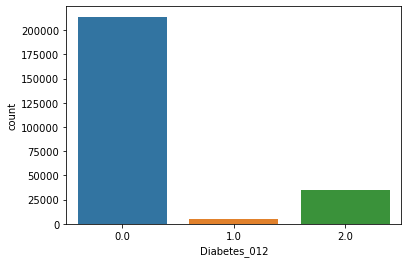

In [7]:
#Renaming Diabetes type from int to string for better consistency
diabetes_df['Diabetes_class'] = diabetes_df['Diabetes_012'].replace({0.0:'No Diabetes', 1.0:'prediabetes ', 2.0:'diabetes'})

# Finding the count of each class label
no_diabetes_cnt = len(diabetes_df[diabetes_df.Diabetes_012 == 0])
pre_diabetes_cnt = len(diabetes_df[diabetes_df.Diabetes_012 == 1])
diabetes_cnt = len(diabetes_df[diabetes_df.Diabetes_012 == 2])

print('The Class Imbalance in the dataset is given below\n')

print("\nIn terms of counts")
print("    No Diabetes    : ",no_diabetes_cnt)
print("    Prediabetes    : ", pre_diabetes_cnt)
print("    Diabetes       : ",diabetes_cnt )

print("\nIn terms of percetage")
total_cnt = len(diabetes_df.Diabetes_012)
print("    No Diabetes    : {:.2f} %".format((no_diabetes_cnt / (total_cnt)*100)))
print("    Prediabetes    : {:.2f} %".format((pre_diabetes_cnt / (total_cnt)*100)))
print("    Diabetes       : {:.2f} %".format((diabetes_cnt / (total_cnt)*100)))

print("\n\nCOUNT PLOT")
# countplot
sns.countplot(x ='Diabetes_012', data = diabetes_df)
plt.show()



<h4><br><ins><br>2.3. Provide appropriate data visualizations to get an insight about the dataset.</ins></h4>

In [8]:
# First we will try to find out the basic info about the data.
# This will provide us with info on each column(feature) in the dataset .
# Also, we can get insights into the null values in the data as well as its datatype.

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Here we see that we have 253680 data points. With 21 features (of type float) and 1 class (Diabetes_012) variable

In [9]:
# We will try to describe the data, which will give is five number summary
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<ins>Observation:</ins> Here we can see that all the features , except BMI seems to have dicreete values (Categorical data). BMI seems to have a continuous data ranging between 12 to 98.

In [10]:
for cols in diabetes_df.columns:
    print(diabetes_df[cols].value_counts())
    print("\n")

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


0.0    144851
1.0    108829
Name: HighBP, dtype: int64


0.0    146089
1.0    107591
Name: HighChol, dtype: int64


1.0    244210
0.0      9470
Name: CholCheck, dtype: int64


27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64


0.0    141257
1.0    112423
Name: Smoker, dtype: int64


0.0    243388
1.0     10292
Name: Stroke, dtype: int64


0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64


1.0    160898
0.0     92782
Name: Fruits, dtype: int64


1.0    205841
0.0     47839
Name: Veggies, dtype: int64


0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64


1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64


0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64


From the above data, we can cleary confirm that only continous data is "BMI". Apart from that all are discreet data.<br><br>



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
HighBP                                             
0.0                  134391      8742          1718
1.0                   79312     26604          2913


 Graphical representation:


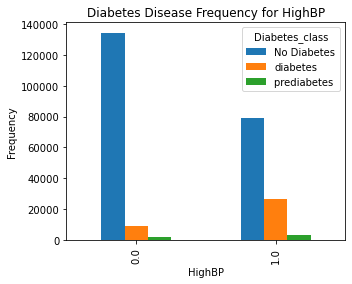

In [11]:
# Relation between HighBP and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.HighBP,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(5,4))
plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
HighChol                                           
0.0                  132673     11660          1756
1.0                   81030     23686          2875


 Graphical representation:


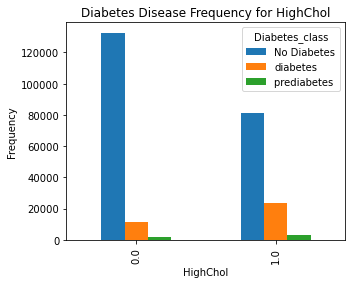

In [12]:
# Relation between HighChol and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.HighChol,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(5,4))
plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
HighChol                                           
0.0                  132673     11660          1756
1.0                   81030     23686          2875


 Graphical representation:


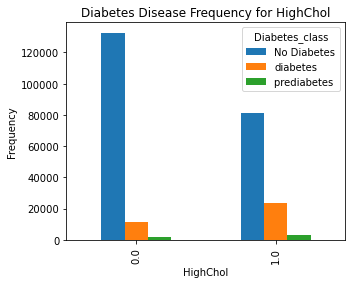

In [13]:
# Relation between HighChol and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.HighChol,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(5,4))
plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
CholCheck                                          
0.0                    9167       241            62
1.0                  204536     35105          4569


 Graphical representation:


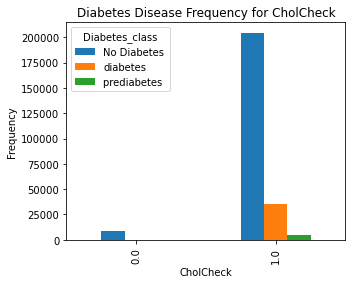

In [14]:
# Relation between CholCheck and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.CholCheck,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(5,4))
plt.title('Diabetes Disease Frequency for CholCheck')
plt.xlabel("CholCheck")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Smoker                                             
0.0                  121879     17029          2349
1.0                   91824     18317          2282


 Graphical representation:


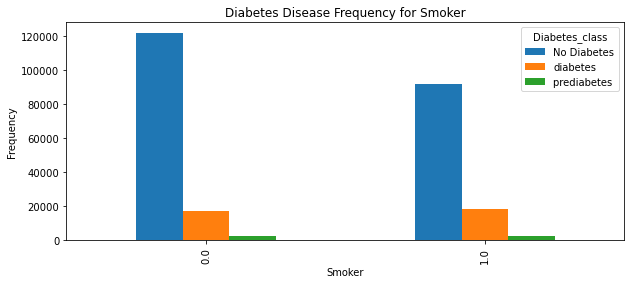

In [15]:
# Relation between Smoker and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Smoker,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Smoker')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Stroke                                             
0.0                  206944     32078          4366
1.0                    6759      3268           265


 Graphical representation:


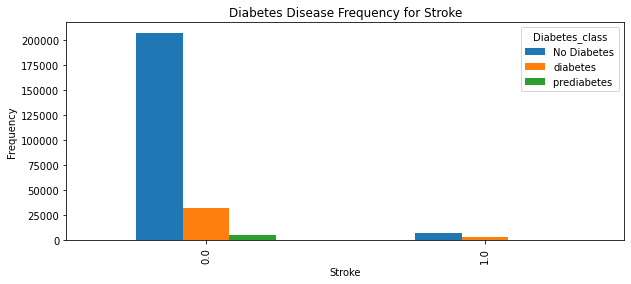

In [16]:
# Relation between Stroke and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Stroke,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Stroke')
plt.xlabel("Stroke")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class        No Diabetes  diabetes  prediabetes 
HeartDiseaseorAttack                                     
0.0                        198352     27468          3967
1.0                         15351      7878           664


 Graphical representation:


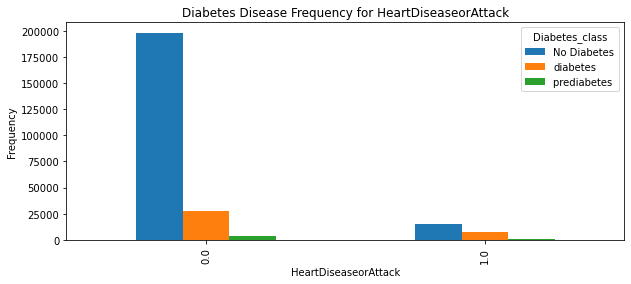

In [17]:
# Relation between HeartDiseaseorAttack and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.HeartDiseaseorAttack,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for HeartDiseaseorAttack')
plt.xlabel("HeartDiseaseorAttack")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
PhysActivity                                       
0.0                   47212     13059          1489
1.0                  166491     22287          3142


 Graphical representation:


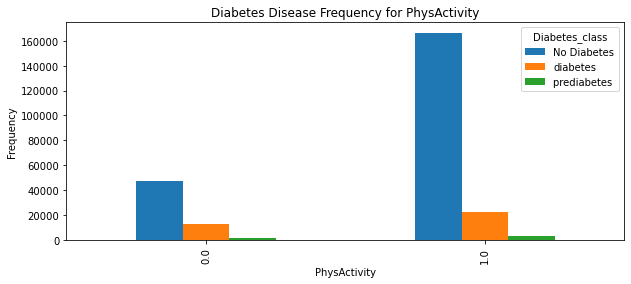

In [18]:
# Relation between PhysActivity and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.PhysActivity,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Fruits                                             
0.0                   76287     14653          1842
1.0                  137416     20693          2789


 Graphical representation:


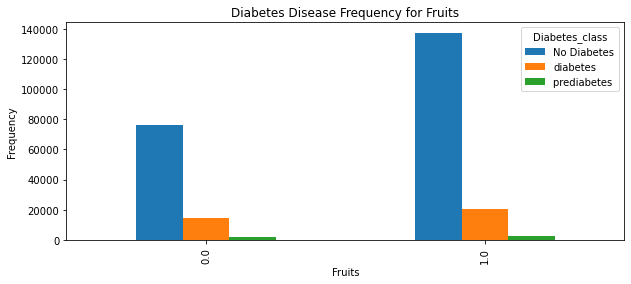

In [19]:
# Relation between Fruits and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Fruits,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Veggies                                            
0.0                   38159      8610          1070
1.0                  175544     26736          3561


 Graphical representation:


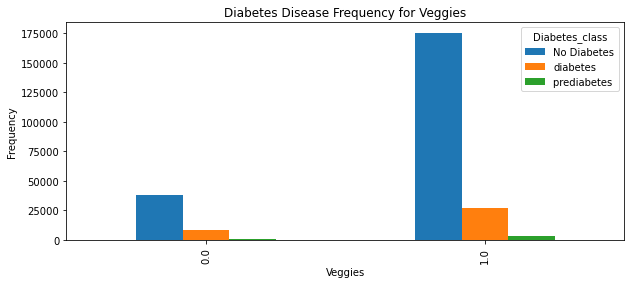

In [20]:
# Relation between Veggies and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Veggies,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class     No Diabetes  diabetes  prediabetes 
HvyAlcoholConsump                                     
0.0                     200487     34514          4423
1.0                      13216       832           208


 Graphical representation:


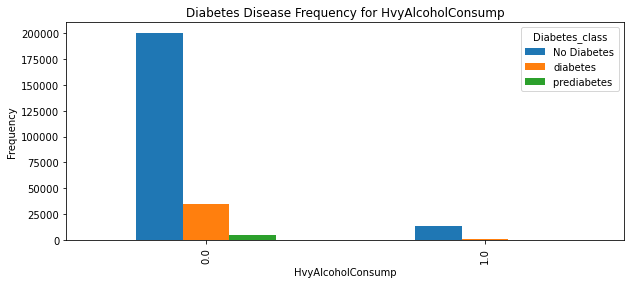

In [21]:
# Relation between HvyAlcoholConsump and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.HvyAlcoholConsump,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for HvyAlcoholConsump')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
AnyHealthcare                                      
0.0                   10741      1422           254
1.0                  202962     33924          4377


 Graphical representation:


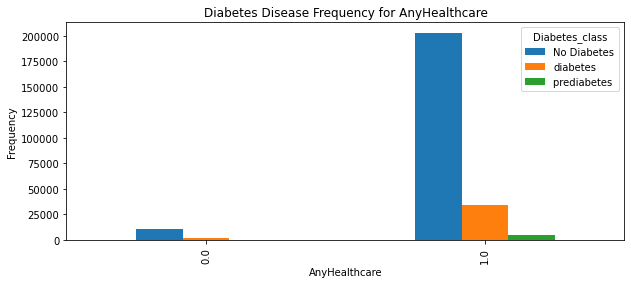

In [22]:
# Relation between AnyHealthcare and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.AnyHealthcare,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for AnyHealthcare')
plt.xlabel("AnyHealthcare")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
NoDocbcCost                                        
0.0                  196690     31604          4032
1.0                   17013      3742           599


 Graphical representation:


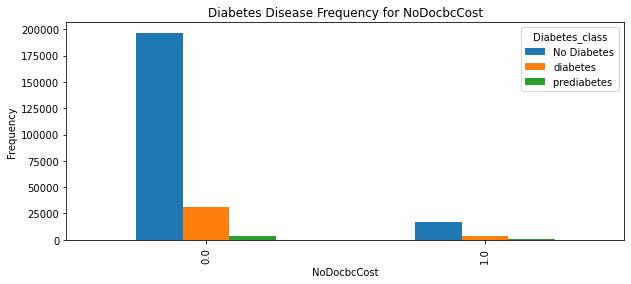

In [23]:
# Relation between NoDocbcCost and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.NoDocbcCost,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for NoDocbcCost')
plt.xlabel("NoDocbcCost")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
GenHlth                                            
1.0                   43846      1140           313
2.0                   81489      6381          1214
3.0                   60461     13457          1728
4.0                   20755      9790          1025
5.0                    7152      4578           351


 Graphical representation:


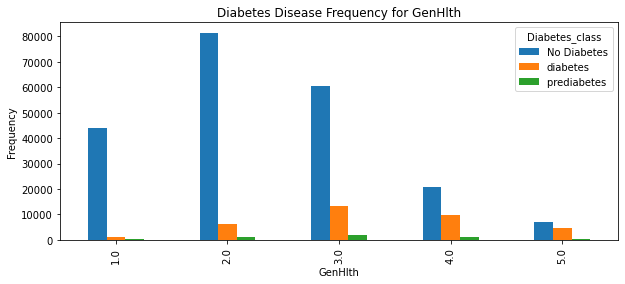

In [24]:
# Relation between GenHlth and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.GenHlth,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel("GenHlth")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
MentHlth                                           
0.0                  149321     23403          2956
1.0                    7606       812           120
2.0                   11315      1508           231
3.0                    6332       924           125
4.0                    3217       489            83
5.0                    7626      1223           181
6.0                     796       164            28
7.0                    2632       405            63
8.0                     516       110            13
9.0                      69        13             9
10.0                   5170      1064           139
11.0                     36         3             2
12.0                    321        67            10
13.0                     33         8             0
14.0                    937       198            32
15.0                   4349      1023           133
16.0                     73        14

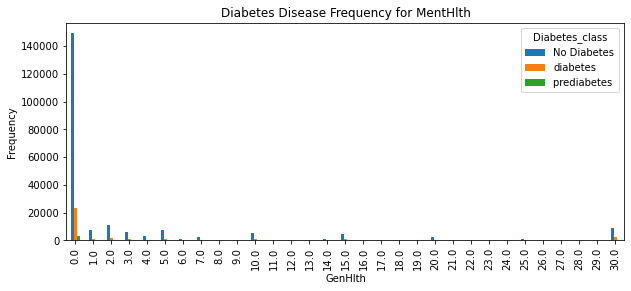

In [25]:
# Relation between MentHlth and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.MentHlth,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel("GenHlth")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
PhysHlth                                           
0.0                  140841     16740          2471
1.0                   10026      1188           174
2.0                   12488      2028           248
3.0                    7033      1289           173
4.0                    3681       763            98
5.0                    6140      1314           168
6.0                    1010       282            38
7.0                    3705       743            90
8.0                     629       159            21
9.0                     138        36             5
10.0                   4135      1290           170
11.0                     45        12             3
12.0                    430       129            19
13.0                     45        16             7
14.0                   2052       473            62
15.0                   3480      1295           141
16.0                     75        34

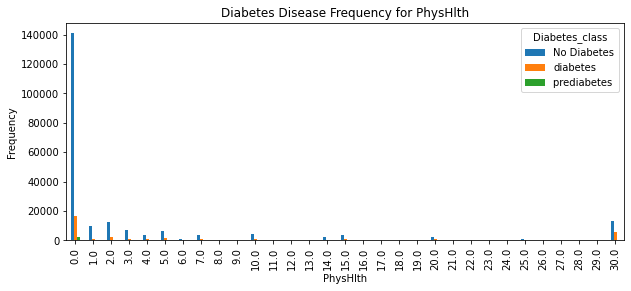

In [26]:
# Relation between PhysHlth and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.PhysHlth,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel("PhysHlth")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Sex                                                
0.0                  120959     18411          2604
1.0                   92744     16935          2027


 Graphical representation:


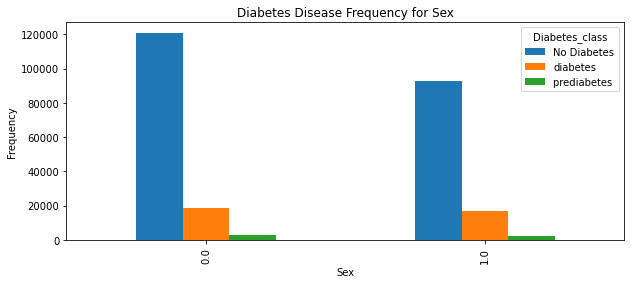

In [27]:
# Relation between Sex and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Sex,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Age                                                
1.0                    5601        78            21
2.0                    7404       140            54
3.0                   10737       314            72
4.0                   13055       626           142
5.0                   14943      1051           163
6.0                   17765      1742           312
7.0                   22808      3088           418
8.0                   26019      4263           550
9.0                   26809      5733           702
10.0                  24939      6558           697
11.0                  17790      5141           602
12.0                  12132      3403           445
13.0                  13701      3209           453


 Graphical representation:


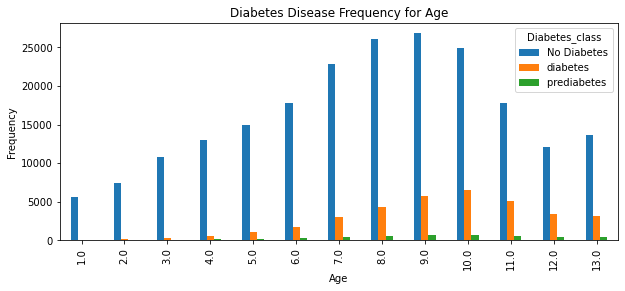

In [28]:
# Relation between Age and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Age,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Education                                          
1.0                     125        47             2
2.0                    2699      1183           161
3.0                    6868      2296           314
4.0                   50334     11066          1350
5.0                   58223     10354          1333
6.0                   95454     10400          1471


 Graphical representation:


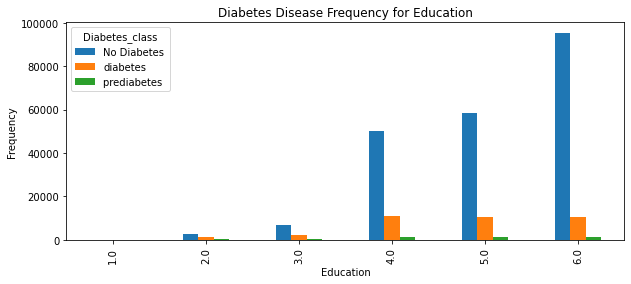

In [29]:
# Relation between Education and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Education,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Education')
plt.xlabel("Education")
plt.ylabel('Frequency')
plt.show()



Tabular representation:

Diabetes_class  No Diabetes  diabetes  prediabetes 
Income                                             
1.0                    7114      2383           314
2.0                    8341      3086           356
3.0                   12005      3568           421
4.0                   15622      4054           459
5.0                   20792      4504           587
6.0                   30431      5291           748
7.0                   37219      5265           735
8.0                   82179      7195          1011


 Graphical representation:


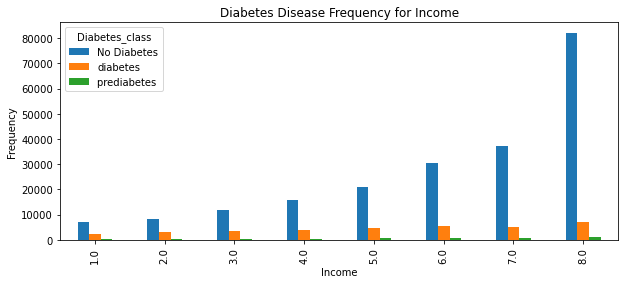

In [30]:
# Relation between Income and Diabetes_012
print("\n\nTabular representation:\n")
table_values = pd.crosstab(diabetes_df.Income,diabetes_df.Diabetes_class)
print(table_values)
print("\n\n Graphical representation:")
table_values.plot(kind="bar",figsize=(10,4))
plt.title('Diabetes Disease Frequency for Income')
plt.xlabel("Income")
plt.ylabel('Frequency')
plt.show()

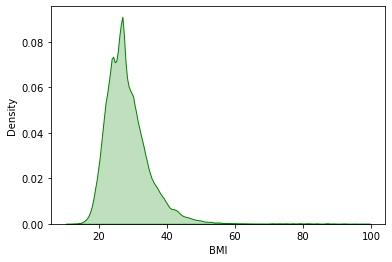

BMI Skewness :  2.122003758291108


In [31]:
sns.kdeplot(diabetes_df['BMI'], shade = True , color = "Green")
plt.show()
print('BMI Skewness : ',diabetes_df['BMI'].skew())

<h4><br><br><ins>OBSERVATIONS FROM THE DATA VISUALIZATION</ins></h4>

1. From the above data it can be clearly seen that there are no missing values in the data. All the data features are of float64 type
2. Most columns CATEGORICAL DATA (binary values).
3. Others are encoded to for a bin for a range of values. Fequency for each value for each column can be observed.
4. More diabetes cases are found in people with HighChol.
5. It is clear that people who had cholesterol check in 5 years have been diagnosed with diabetes. The correlation is high.
6. Smoker doesnt not seem to have a big effect on cause of Diabetes. No Correlation.
7. This seems to be like data sparsing. Surprisiningly from the data it seems that people who had strokes, chances of diabetes is less. Negatively correlated
8. Similar to stroke . Surprisiningly from the data it seems that people who had strokes, chances of diabetes is less. Negatively correlated
9. The data shows that number of people doing physical activity is way more than the one's noit doing it. So if we compare the ratio of diabetics in both the cases, it seems that proportion of diabetes in people doing physical activity is less
10. The data shows that number of people consuming Fruit is more than the one's not doing it. So if we compare the ratio of diabetics in both the cases, it seems that proportion of diabetes in people consuming Fruit is less
11. The data shows that number of people consuming Vegetables is more than the one's not doing it. So if we compare the ratio of diabetics in both the cases, it seems that proportion of diabetes in people consuming Vegetables is less
12. Almost NIL diabetes for heavy drinkers . Seems lack of data
13. Cases discovered more in people having health care coverage. This could be an indication that people covered under healthcare coverage are getting tested more. Also we may have more biased data from one data source|
14. Ratio of diabetic person is mote in people who are have complained about serious difficulty walking or climbing stairs.



<b>
    From what we see that most of the data are binary data.<br>
    All model features are categorical except Body Mass Index (BMI)<br>
    Based on the above profiling report health care coverage is weakly correlated to diabetes thus will be excluded from the model features.</b>
<br><br>

<h2><br><br><center>3. Data Pre-processing and Cleaning<br><br></center></h2>

<h4><ins><b>Do the appropriate pre-processing of the data like identifying NULL or Missing Values
if any, handling of outliers if present in the dataset, skewed data etc. Mention the preprocessing
steps performed in the markdown cell with justification<b><ins><h4>

 <b>Identifying and removing null/NAs in the data set<b>

In [38]:
diabetes_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_class          0
dtype: int64

<br><ins>Identifying NULL or Missing Values</ins> : From the above information we see that there are no missing values in the dataset. Hence no null/na treatment is needed. We can go ahead.<br><br>

 <b>Identifying and removing duplicates in the data set</b>

In [39]:
diabetes_df.duplicated().sum()

23899

<br><ins>There are 23899 duplicate rows in the dataset</ins>. We are going to drop them keeping only the last occurance of the data point in the data set.<br><br>

In [40]:
#Shape of the input dataframe before removing duplicates
diabetes_df.shape

(253680, 23)

In [41]:
# Dropping the duplicates from the data set with inplace as True.
diabetes_df.drop_duplicates(keep="last", inplace=True)

In [42]:
diabetes_df.shape

(229781, 23)

In [43]:
diabetes_df.duplicated().sum()

0

<ins>We see that shape of the datframe is changed with lesser number of rows. Also, we are not getting any duplicated. Hence duplcate values are treated.</ins><br><br>

<h4><ins>Outlier Analysis</ins></h4>

##### What are outliers ? 
   - An outlier is an observation that is unlike the other observations.
   - Outliers can have many causes, such as:
           - Measurement or input error.
           - Data corruption.
           - True outlier observation
            
There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, you, or a domain expert, must interpret the raw observations and decide whether a value is an outlier or not.This does not mean that the values identified are outliers and should be removed. We can imply following ways to treat outliers. 
      
  - *Standard Deviation Method*
  - *Interquartile Range Method*
      
We will see them one by one.


#### Standard Deviation Method :

 If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard devation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample

**Sometimes, the data is standardized first (e.g. to a Z-score with zero mean and unit variance) so that the outlier detection can be performed using standard Z-score cut-off values. This is a convenience and is not required in general, and we will perform the calculations in the original scale of the data here to make things clear.**

We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.4


#### Interquartile Range Method :

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

**Statistics-based outlier detection techniques assume that the normal data points would appear in high probability regions of a stochastic model, while outliers would occur in the low probability regions of a stochastic model.**

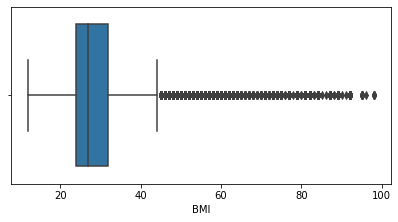

In [44]:
#Let's use box plot for initial analysis of the outliers. 

plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = diabetes_df)
plt.show()

###### Observation : We observe that most of the outliers are present in  BMI <br><br>

<b> We are using <ins>Interquartile Range Method</ins> to perform futher outlier analysis on the data.</b> We have categorized the outputs in twp classes . They are : <br><br>
    <ins>1. 'Major' Outliers: </ins> : The data points which breach 3.0 * iqr.<br>
    <ins>2. 'Minor' Outliers: </ins> : The data points which breach 1.5 * iqr.<br><br>
    
We will be doing this only on 'BMI' as rest all features are CATEGORICAL in nature.

In [45]:
def getOutlierScores(param_diabetes_df) :
    q1 = []
    q3 = []
    minor_outlier_upper = []
    minor_outlier_lower = []
    major_outlier_lower = []
    major_outlier_upper = []
    minor_outlier_lower_bound = []
    minor_outlier_upper_bound = []
    major_outlier_lower_bound = []
    major_outlier_upper_bound = []
    major_outlier_upper_bound = []
    cont_column_names = ['BMI']

    for col_names in cont_column_names:
        q3                         = param_diabetes_df[col_names].quantile(0.75)
        q1                         = param_diabetes_df[col_names].quantile(0.25)
        iqr                        = q3-q1 

        minor_outlier_thresh_upper = q3+1.5*iqr
        minor_outlier_thresh_lower = q1-1.5*iqr

        major_outlier_thresh_upper = q3+3*iqr
        major_outlier_thresh_lower = q1-3*iqr

        minor_outlier_upper.append(round((sum(np.where(param_diabetes_df[col_names]>minor_outlier_thresh_upper,1,0))),4))
        minor_outlier_lower.append(round((sum(np.where(param_diabetes_df[col_names]<minor_outlier_thresh_lower,1,0))),4))

        major_outlier_upper.append(round((sum(np.where(param_diabetes_df[col_names]>major_outlier_thresh_upper,1,0))),4))
        major_outlier_lower.append(round((sum(np.where(param_diabetes_df[col_names]<major_outlier_thresh_lower,1,0))),4))

        minor_outlier_lower_bound.append(minor_outlier_thresh_lower)
        minor_outlier_upper_bound.append(minor_outlier_thresh_upper)

        major_outlier_lower_bound.append(major_outlier_thresh_lower)
        major_outlier_upper_bound.append(major_outlier_thresh_upper)


    outlier_df = pd.DataFrame(cont_column_names,columns=['Features'])

    outlier_df['Q1']                    = q1
    outlier_df['Q3']                    = q3
    outlier_df['Q1-1.5*IQR']                    = minor_outlier_lower_bound
    outlier_df['Q3+1.5*IQR']                    = minor_outlier_upper_bound
    outlier_df['Q1-3*IQR']                    = major_outlier_lower_bound
    outlier_df['Q3+3*IQR']                    = major_outlier_upper_bound

    outlier_df['minor_outlier_lower']                    = minor_outlier_lower
    outlier_df['minor_outlier_upper']                    = minor_outlier_upper
    outlier_df['major_outlier_lower']                    = major_outlier_lower
    outlier_df['major_outlier_upper']                    = major_outlier_upper

    outlier_df['Minor_outlier_lower_bound_pct'] = 100*np.array(minor_outlier_lower)/param_diabetes_df.shape[0]
    outlier_df['Minor_outlier_upper_bound_pct'] = 100*np.array(minor_outlier_upper)/param_diabetes_df.shape[0]


    outlier_df['Major_outlier_lower_bound_pct'] = 100*np.array(major_outlier_lower)/param_diabetes_df.shape[0]
    outlier_df['Major_outlier_upper_bound_pct'] = 100*np.array(major_outlier_upper)/param_diabetes_df.shape[0]
    return outlier_df

outlier_table = getOutlierScores(diabetes_df)
outlier_table.T

,0
Features,BMI
Q1,24.0
Q3,32.0
Q1-1.5*IQR,12.0
Q3+1.5*IQR,44.0
Q1-3*IQR,0.0
Q3+3*IQR,56.0
minor_outlier_lower,0
minor_outlier_upper,5638
major_outlier_lower,0


<b> From the table above, we see that there are 1079 'major' outliers in BMI. </b>  <br>

<ins><b>Treatment:</b></ins>  Will can afford to drop those data points from the dataset as we have large number of data points.

In [46]:
q3                         = diabetes_df.BMI.quantile(0.75)
q1                         = diabetes_df.BMI.quantile(0.25)
iqr                        = q3-q1 
major_outlier_thresh_upper = q3+3*iqr
bmi_outliers = diabetes_df.BMI>major_outlier_thresh_upper
outliers_labels = []
for index, isOutlier in enumerate(bmi_outliers):
    if isOutlier:
        outliers_labels.append(index)
print(len(outliers_labels))

diabetes_df = diabetes_df.drop(diabetes_df.index[outliers_labels])

1079


<b> At this point we have removed the data points which constituted of MAJOR outliers. Also, as the data is highly imbalanced we need to perform some balancing tasks while we are going with the Modeling.</b>  <br>

<h4><ins>SKEWNESS Analysis</ins></h4><br>

   <b>It makes no sense for doing analaysis categorical attributes. We will be doing the skewness analysis on relatively continous data such as BMI.</b>
  <br>

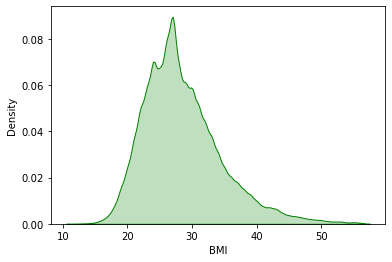

BMI  :  0.9908838182304736


In [47]:
 for col in ['BMI']:
    sns.kdeplot(diabetes_df[col], shade = True , color = "Green")
    plt.show()
    print(col ," : ",diabetes_df[col].skew())

<ins><br>We see that BMI is sligly skewed but it has shown a drastic improvement after handling out outliers. We will try to apply some normalisation technique.</ins><br><br>

<h4><ins><b><br><br>Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and  the complexity of your dataset. Provide proper justification.<b><ins><h4>

<b> Please note , we will be performing below activities as part of pre processing: </b><br>
        1. Normalise the continiuous attributes <br>
        2. Standardize the continuous attibutes, using standard scaler.  <br>
        3. Check for the important features using RandomForestClassifier. <br><br><br>

In [48]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_class
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,No Diabetes
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,No Diabetes
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,No Diabetes
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,No Diabetes
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,No Diabetes


In [49]:
diabetes_df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_class
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,No Diabetes
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,diabetes
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,No Diabetes
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,No Diabetes
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0,diabetes


In [50]:
diabetes_df.Diabetes_012.value_counts()

0.0    189279
2.0     34819
1.0      4604
Name: Diabetes_012, dtype: int64